# Titanic Data Set - Statistics Review

[Variable Descriptions](https://www.kaggle.com/c/titanic/data).

In [168]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('titanic.csv')

**Describe the data. **
- How big?
- What are the columns and what do they mean?

In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

survived - 0: No 1: Yes 
pclass - passenger class
sibsp - Number of Siblings/Spouses Aboard
parch - Number of Parents/Children Aboard
ticket - Ticket Number
fare - Passenger Fare
cabin - Cabin
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.describe()

/Users/mac/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**What’s the average age of:**

- Any Titanic passenger
- A survivor
- A non-surviving first-class passenger
- Male survivors older than 30 from anywhere but Queenstown

**For the groups from the previous task, how far (in years) are the average ages from the median ages?**

In [35]:
# dataframes stored for each subset
survivor_set = df[df['Survived'] == 1]
nonsurv_1stclass = df[(df['Survived'] == 0) & df['Pclass'] == 1]
male_surv_30plus_notQ = survivor_set[(survivor_set['Sex'] == 'male') & (survivor_set['Age'] > 30) & (survivor_set['Embarked'] != 'Q')] 

In [46]:
# helper dataframes
survived = df['Survived'] == 1
firstclass = df['Pclass'] == 1
sex_male = df['Sex'] == 'male'
has_family = (df['SibSp'] > 0) | (df['Parch'] > 0)

In [75]:
avg_age = pd.DataFrame([df['Age'].mean(),
                     survivor_set['Age'].mean(),
                     nonsurv_1stclass['Age'].mean(),
                     male_surv_30plus_notQ['Age'].mean()], index=['Any Passenger',
                                                                  'Any Survivor',
                                                                  'Any Non-Survivor in 1st Class',
                                                                  'Any Male Survivors Over 30 Not From Queenstown'])

In [76]:
avg_age

,0
Any Passenger,29.699118
Any Survivor,28.343690
Any Non-Survivor in 1st Class,29.839820
Any Male Survivors Over 30 Not From Queenstown,41.487805


In [77]:
median_age = pd.DataFrame([df['Age'].median(),
                     survivor_set['Age'].median(),
                     nonsurv_1stclass['Age'].median(),
                     male_surv_30plus_notQ['Age'].median()], index=['Any Passenger',
                                                                  'Any Survivor',
                                                                  'Any Non-Survivor in 1st Class',
                                                                  'Any Male Survivors Over 30 Not From Queenstown'])



In [78]:
median_age

,0
Any Passenger,28.0
Any Survivor,28.0
Any Non-Survivor in 1st Class,28.0
Any Male Survivors Over 30 Not From Queenstown,38.0


In [79]:
# difference of mean and median ages
diff_ages = avg_age - median_age

In [80]:
diff_ages

,0
Any Passenger,1.699118
Any Survivor,0.343690
Any Non-Survivor in 1st Class,1.839820
Any Male Survivors Over 30 Not From Queenstown,3.487805


**What’s the most common:**
- Passenger class
- Port of Embarkation
- Number of siblings or spouses aboard for survivors

In [63]:
embark_port = {
    'C' : 'Cherbourg',
    'Q' : 'Queenstown',
    'S' : 'Southampton'
    
}
mode_set = pd.DataFrame([df['Pclass'].mode(),
                              df['Embarked'].mode().map(embark_port),
                            survivor_set['SibSp'].mode()], index=['Passenger class', 'Port of Embarkation', 'Number of Siblings or Spouses aboard'])

In [64]:
mode_set

,0
Passenger class,3
Port of Embarkation,Southampton
Number of Siblings or Spouses aboard,0


**Within what range of standard deviations from the mean (0-1, 1-2, 2-3) is the median ticket price? Is it above or below the mean?**

In [82]:
ticket_price = df['Fare']
median_price_z = (ticket_price.median() - ticket_price.mean()) / ticket_price.mean()

if abs(median_price_z) > 2:
    z_range = '2-3'
elif abs(median_price_z) > 1:
    z_range = '1-2'
elif abs(median_price_z) > 0:
    z_range = '0-1'
    
print('It is in the {} range {} the mean.'.format(z_range, 'above' if median_price_z > 0 else 'below'))

It is in the 0-1 range below the mean.


**How much more expensive was the 90th percentile ticket than the 5th percentile ticket? Are they the same class?**

In [84]:
ticket_price.quantile(0.90) - ticket_price.quantile(0.05)

70.7333

In [98]:
percentile_90 = df[df['Fare'] == ticket_price.quantile(0.9)]
percentile_5 = df[df['Fare'] == ticket_price.quantile(0.05)]

pd.Series([percentile_90.Pclass.unique(),
          percentile_5.Pclass.unique()], index=['90th Percentile Class',
                                         '5th Percentile Class'])

90th Percentile Class    [1]
5th Percentile Class     [3]
dtype: object

**The highest average ticket price was paid by passengers from which port? Null ports don’t count.**

In [138]:
embarked = df[['Embarked','Fare']]
embarked.groupby('Embarked').mean()

,Fare
Embarked,
C,59.954144
Q,13.276030
S,27.079812


**What is the most common passenger class for each port?**

In [147]:
embarked = df[['Embarked','Pclass']]
embarked.groupby('Embarked').Pclass.apply(lambda x: x.mode())

Embarked   
C         0    1
Q         0    3
S         0    3
Name: Pclass, dtype: int64

**What fraction of surviving 1st-class males paid lower than double the overall median ticket price?**

In [155]:
median_price = df['Fare'].median()
surv_male_1st = df[(survived) & (firstclass) & (sex_male)]

len(surv_male_1st[surv_male_1st['Fare'] < median_price *2]) / len(surv_male_1st)

0.24444444444444444

**How much older/younger was the average surviving passenger with family members than the average non-surviving passenger without them?**

In [161]:
survivor_family = df[(survived) & (has_family)]
survfam_avg = survivor_family['Age'].mean()

In [162]:
nosurv_nofam = df[(~survived) & (~has_family)]
nosurv_nofam_avg = nosurv_nofam['Age'].mean()

In [170]:
print('{} years {}'.format(np.round(abs(survfam_avg - nosurv_nofam_avg), 2), 'younger' if (survfam_avg - nosurv_nofam_avg) < 0 else 'older'))

6.89 years younger


**Display the relationship (i.e. make a plot) between survival rate and the quantile of the ticket price for 20 integer quantiles.**
- To be clearer, what I want is for you to specify 20 quantiles, and for each of those quantiles divide the number of survivors in that quantile by the total number of people in that quantile. That’ll give you the survival rate in that quantile.
- Then plot a line of the survival rate against the ticket fare quantiles.
- Make sure you label your axes.

/Users/mac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/mac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


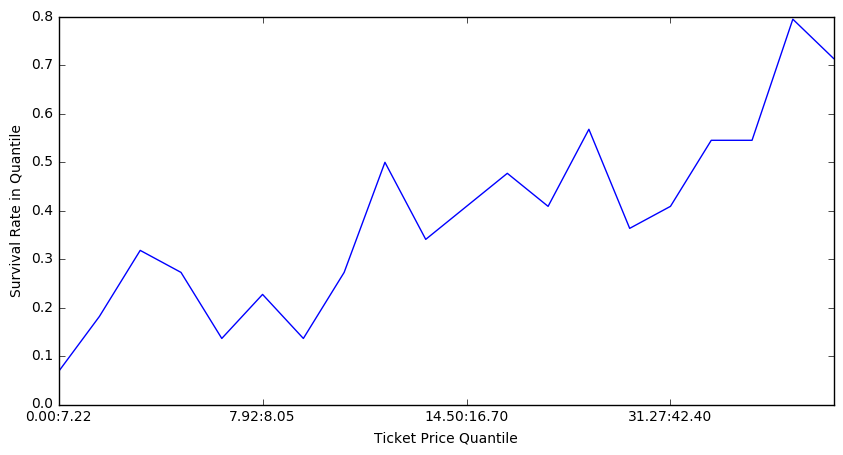

In [197]:
%matplotlib inline
import math

quantiles = 20
dataset_length = len(df['Fare'])
quantile_length = math.ceil(dataset_length / 20) # need 45 because not exact

sort_ticket_price = df.sort_values(['Fare'])
quantile_series = pd.Series()

for i in range(0, dataset_length, quantile_length):
        if (i + quantile_length) < dataset_length:
            quantile = sort_ticket_price.iloc[i:(i+quantile_length - 1)]
            survival_rate = len(quantile[survived]) / len(quantile)
            quantile_name = '{:.2f}:{:.2f}'.format(sort_ticket_price.iloc[i]['Fare'], sort_ticket_price.iloc[i+quantile_length-1]['Fare'])
            quantile_series[quantile_name] = survival_rate
        else:
            quantile = sort_ticket_price.iloc[i:(dataset_length-1)]
            survival_rate = len(quantile[survived]) / len(quantile)
            quantile_name = '{:.2f}:{:.2f}'.format(sort_ticket_price.iloc[i]['Fare'], sort_ticket_price.iloc[dataset_length-1]['Fare'])
            quantile_series[quantile_name] = survival_rate
    
ax = quantile_series.plot(figsize=(10,5))
ax.set_xlabel('Ticket Price Quantile')
ax.set_ylabel('Survival Rate in Quantile')  

**For each of the following characteristics, find the median in the data:**
- Age
- Ticket price
- Siblings/spouses
- Parents/children

In [201]:
median_age = df['Age'].median()
median_price = df['Fare'].median()
median_sibsp = df['SibSp'].median()
median_parch = df['Parch'].median()

median_df = pd.DataFrame([median_age, median_price, median_sibsp, median_parch], index=['Median Age',
                                                                                       'Median Ticket Price',
                                                                                       'Median SibSp',
                                                                                       'Median Parch'])
median_df

,0
Median Age,28.0000
Median Ticket Price,14.4542
Median SibSp,0.0000
Median Parch,0.0000


**If you were to use these medians to draw numerical boundaries separating survivors from non-survivors, which of these characteristics would be the best choice and why?**

In [223]:
# get ratios of survivors below and survivors above medians and compare differences

age_below = len(df[(survived) & (df['Age'] < median_age)]) / len(df[(df['Age'] < median_age)])
age_above = len(df[(survived) & (df['Age'] > median_age)]) / len(df[(df['Age'] > median_age)])
price_below = len(df[(survived) & (df['Fare'] < median_price)]) / len(df[(df['Fare'] < median_price)])
price_above = len(df[(survived) & (df['Fare'] > median_price)]) / len(df[(df['Fare'] > median_price)])
sibsp_below = len(df[(survived) & (df['SibSp'] == median_sibsp)]) / len(df[(df['SibSp'] == median_sibsp)])
sibsp_above = len(df[(survived) & (df['SibSp'] > median_sibsp)]) / len(df[(df['SibSp'] > median_sibsp)])
parch_below = len(df[(survived) & (df['Parch'] == median_parch)]) / len(df[(df['Parch'] == median_parch)])
parch_above = len(df[(survived) & (df['Parch'] > median_parch)]) / len(df[(df['Parch'] > median_parch)])

below_series = [age_below, price_below, sibsp_below, parch_below]
above_series = [age_above, price_above, sibsp_above, parch_above]

series_df = pd.DataFrame([below_series, above_series], index=['Below Median', 'Above Median'], columns=['Age',
                                                                                                       'Ticket Price',
                                                                                                       'Sibling/Spouse',
                                                                                                       'Parents/Children']).transpose()
series_df['Median Difference'] = series_df['Above Median'] - series_df['Below Median']

series_df

,Below Median,Above Median,Median Difference
Age,0.418398,0.403409,-0.014989
Ticket Price,0.252273,0.518018,0.265745
Sibling/Spouse,0.345395,0.466431,0.121036
Parents/Children,0.343658,0.511737,0.168079


**Plot the distribution of passenger ages. Choose visually-meaningful bin sizes and label your axes.**

In [204]:
df['Age'].max()

80.0

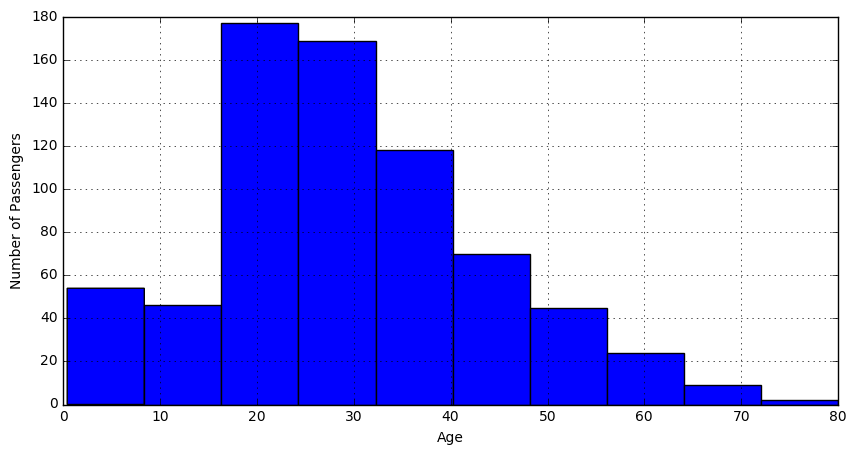

In [212]:
ax = df['Age'].hist(figsize=(10,5), bins=10)
ax.set_xlabel('Age')
ax.set_ylabel('Number of Passengers')

**Find the probability that:**
- A passenger survived
- A passenger was male
- A passenger was female and had at least one sibling or spouse on board
- A survivor was from Cherbourg
- A passenger was less than 10 years old
- A passenger was either younger than 20 years old or older than 50

In [230]:
df[survived]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


In [243]:
# probabilities
probabilities = pd.Series()

probabilities['Passenger Survived'] = len(df[survived]) / len(df)
probabilities['Male Passenger'] = len(df[sex_male]) / len(df)
probabilities['Female with 1 Sibling/Spouse'] = len(df[(~sex_male) & (has_family)]) / len(df)
probabilities['Survivor from Cherbourg'] = len(df[(df['Survived'] == 1) & (df['Embarked'] == 'C')]) / len(df)
probabilities['Passenger less than 10'] = len(df[(df['Age'] < 10)]) / len(df)
probabilities['Passenger less than 20 or older than 50'] = len(df[(df['Age'] < 20) | (df['Age'] > 50)]) / len(df)


probabilities

Passenger Survived                         0.383838
Male Passenger                             0.647587
Female with 1 Sibling/Spouse               0.210999
Survivor from Cherbourg                    0.104377
Passenger less than 10                     0.069585
Passenger less than 20 or older than 50    0.255892
dtype: float64

In [252]:
# check answers compared to solution video
less_20 = len(df[(df['Age'] < 20)])
over_50 = len(df[(df['Age'] > 50)])
(less_20 + over_50) / len(df)


0.2558922558922559

**Knowing nothing else about the passengers aside from the survival rate of the population (see question above), if I choose 100 passengers at random from the passenger list, what’s the probability that exactly 42 passengers survive?**

In [253]:
# import scipy.stats to simulate
import scipy.stats as stats

stats.binom.pmf(k=42, n=100, p=probabilities['Passenger Survived'])

0.061330411815167886

**What’s the probability that at least 42 of those 100 passengers survive?**

In [255]:
prob_less42 = stats.binom.cdf(k=41, n=100, p=probabilities['Passenger Survived'])
prob_42ormore = 1 - prob_less42
prob_42ormore

0.25940724207261701

**Is there a statistically significant difference between:**
- The ages of male and female survivors?
- The fares paid by passengers from Queenstown and the passengers from Cherbourg?

**If so, at what level? If not, how do you know?**

In [256]:
# stastical significance of male and female survivors
all_nonull_ages = df.dropna(subset=['Age'])
ages_male = all_nonull_ages[sex_male]['Age']
ages_female = all_nonull_ages[~sex_male]['Age']

stats.ttest_ind(a=ages_male,
               b=ages_female,
               equal_var=False) # do not assume variance is equal

/Users/mac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Users/mac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Ttest_indResult(statistic=2.5258975171938896, pvalue=0.011814913211889735)

Statistically significant at the 0.05 level.

In [257]:
# statistical significance between fares paid from Q and C
price_of_Q = df[df['Embarked'] =='Q']['Fare']
price_of_C = df[df['Embarked'] =='C']['Fare']

stats.ttest_ind(a=price_of_Q,
               b=price_of_C,
               equal_var=False)

Ttest_indResult(statistic=-6.9951971047186809, pvalue=4.5792033919567422e-11)

Statistically significant at the 0.01 level.

**Accompany your p-A with histograms showing the distributions of both compared populations.**

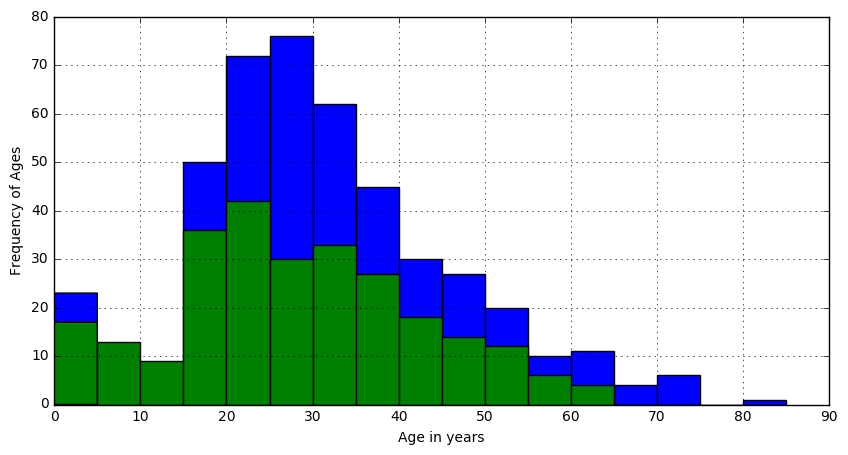

In [265]:
binsto90 = range(0, 90, 5)
ax = ages_male.hist(bins=binsto90, figsize=(10,5))
ages_female.hist(bins=binsto90)
ax.set_xlabel("Age in years")
ax.set_ylabel("Frequency of Ages")

In [261]:
df['Fare'].max()

512.32920000000001

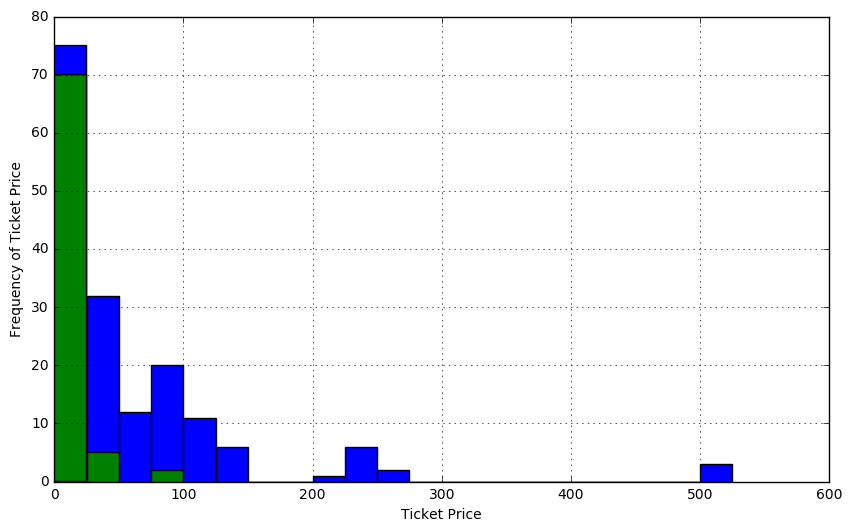

In [267]:
binsto550 = range(0, 550, 25)
ax = price_of_C.hist(bins=binsto550, figsize=(10,6))
price_of_Q.hist(bins=binsto550)
ax.set_xlabel('Ticket Price')
ax.set_ylabel('Frequency of Ticket Price')

**Did survivors pay more for their tickets than those that did not? If so, to what significance level?**

In [269]:
survivor_price = survivor_set['Fare']
nonsurvivor_price = df[~survived]['Fare']

print(survivor_price.mean() - nonsurvivor_price.mean())

stats.ttest_ind(a=survivor_price,
               b=nonsurvivor_price,
               equal_var=False)

26.277520717093292


Ttest_indResult(statistic=6.8390992590852537, pvalue=2.6993323503141236e-11)

Significance level of 0.01.

**Did a given first-class passenger have less family members on board than a given third-class passenger? If so, to what significance level?**

In [270]:
first_class = df[firstclass]
third_class = df[df['Pclass'] == 3]

firstclass_fam = first_class['SibSp'] + first_class['Parch']
thirdclass_fam = third_class['SibSp'] + third_class['Parch']

print(firstclass_fam.mean() - thirdclass_fam.mean())

stats.ttest_ind(a=firstclass_fam,
               b=thirdclass_fam,
               equal_var=False)

-0.2349984913630534


Ttest_indResult(statistic=-2.0799075748873195, pvalue=0.037907385748521927)

Significance level of 0.05.